In [1]:
import pandas as pd
import numpy as np

C:\Users\GTSHADOOP\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\GTSHADOOP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\GTSHADOOP\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data=pd.read_csv(r'./preprocess.csv')

In [3]:
data.head()

,Unnamed: 0,N,P,K,temperature,humidity,rainfall,label
0,0,90,42,43,20.879744,82.002744,202.935536,20
1,1,85,58,41,21.770462,80.319644,226.655537,20
2,2,60,55,44,23.004459,82.320763,263.964248,20
3,3,74,35,40,26.491096,80.158363,242.864034,20
4,4,78,42,42,20.130175,81.604873,262.717340,20


In [4]:
data=data.drop(columns='Unnamed: 0')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   rainfall     2200 non-null   float64
 6   label        2200 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 120.4 KB


In [6]:
data.describe()

,N,P,K,temperature,humidity,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,298.560117,21.000000


In [7]:
X = data[['N','P','K','temperature','humidity','rainfall']]
Y=data['label']
print(X.shape)
print(Y.shape)

(2200, 6)
(2200,)


In [8]:
data['label'].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

In [10]:
#!pip install imbalanced-learn==0.9.0 --user
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
X_bal, Y_bal = sm.fit_resample(X, Y)

In [11]:
print(Y.shape)
Y.value_counts()

(2200,)


20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

In [12]:
print(Y_bal.shape)
Y_bal.value_counts()

(2186,)


12    100
0     100
3     100
9     100
18    100
14    100
4     100
17    100
19    100
1     100
16    100
7     100
21    100
15    100
6      99
5      99
11     99
2      99
10     98
20     98
13     97
8      97
Name: label, dtype: int64

In [13]:
data['label'].value_counts()

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_bal, Y_bal, test_size=0.15, random_state=111)

In [15]:
X_train

,N,P,K,temperature,humidity,rainfall
1448,100,14,49,29.488830,91.075742,26.019094
260,22,64,82,19.489743,17.172603,87.513128
1539,16,143,204,23.714753,91.533312,121.896167
1925,131,52,16,23.657241,84.476015,88.544791
815,12,66,20,27.414350,63.417860,44.431775
...,...,...,...,...,...,...
118,77,57,21,24.932158,73.804353,79.740787
681,19,39,17,29.280862,81.800924,44.474274
86,82,43,38,23.286172,81.433216,242.317063
724,20,72,19,32.476483,64.348487,65.820457


In [16]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(min_samples_split=7, random_state=111)
etc.fit(X_train,Y_train)
#ET=etc.score(X_train,Y_train)
ETC = etc.score(X_test, Y_test)
print('Score:{}'.format(ETC))

Score:1.0


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
Y_pred = etc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)


Confusion Matrix
[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
GBc=GradientBoostingClassifier(n_estimators=100)
GBc.fit(X_train,Y_train)
GBC=GBc.score(X_test,Y_test)
GBC

0.9969512195121951

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
Y_pred = GBc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)


Confusion Matrix
[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

In [20]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,Y_train)
LR=lrc.score(X_train,Y_train)
LRC = lrc.score(X_test, Y_test)
print('Score:{}'.format(LRC))

Score:0.9542682926829268


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
Y_pred = lrc.predict(X_test)
confusion_mat = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix")
print(confusion_mat)


Confusion Matrix
[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0 16  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0 

In [22]:
print('GradientBoosting',GBC*100)
print('EXtra tree',ETC*100)
print('LogisticRegression',LRC*100)

GradientBoosting 99.6951219512195
EXtra tree 100.0
LogisticRegression 95.42682926829268


In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

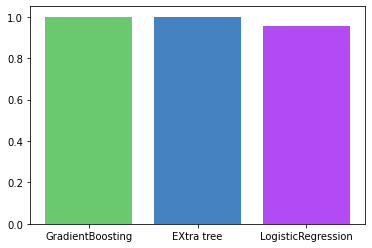

In [24]:
GBC = GBC 
ETC=ETC 
LRC=LRC
height = [GBC,ETC,LRC]
bars = ( 'GradientBoosting', 'EXtra tree','LogisticRegression')
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['#69C96E', '#4482C1', '#B24BF3'])
plt.xticks(x_pos, bars)
plt.show()

In [25]:
import joblib

In [26]:
joblib.dump(etc,'model.plk')

['model.plk']

In [27]:
pre=joblib.load('model.plk')

In [28]:
pre

ExtraTreesClassifier(min_samples_split=7, random_state=111)

In [29]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'rainfall', 'label'], dtype='object')

In [30]:
N=input("")
P=input("")
K=input("")
temperature=input("")
humidity=input("")
rainfall=input("")

45
16
16
16
61
16


In [33]:
querry=np.array([[N, P, K,temperature, humidity, rainfall]])

In [34]:
ans=pre.predict(querry)

C:\Users\GTSHADOOP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [35]:
ans

array([13], dtype=int64)